In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from glob import glob
from itertools import chain

%matplotlib inline
import matplotlib.pyplot as plt



In [21]:
#Open the labeled dataset - dataset with the diagnosis 
df_xray_images = pd.read_csv('Data_Entry_2017.csv')

df_xray_images.shape


(112120, 11)

In [22]:
# create a list to import the name and path of all x-ray images
lst = []
for file in os.listdir("D:\\NIH Images\\NIH Images"):
#    #proccess all images in the directory to get the name and path
    lst.append({'Image Index': file, 'Path': "D:\\NIH Images\\NIH Images\\" + file})

#convert a list on dataframe    
df_path = pd.DataFrame(lst)
df_path.head()

#inner merge based on the filename
df_xray_images = df_xray_images.merge(df_path, how = 'inner', on = ['Image Index'])

df_xray_images.shape

(112120, 12)

#### Preprocessing Labels

Neste passo precisamos converter as labels em formato string para binário para que o algoritmo possa interpertar. 
15 doenças (labels) foram identificadas no dataset.
Essas 15 labels precisam ser convertidas em features (colunas) e para cada valor identificado, a label receberá 1.0 como valor.
O grande desafio será trabalhar com as doenças repetidas, por exemplo, em uma imagem de Raio X, mais de 1 doença (label) pode ter sido identificada.


In [23]:
#grouping labels (doenças).
# Its possible to identify values with multi labels
label_counts = df_xray_images['Finding Labels'].value_counts()
label_counts.head(10)

No Finding                  60361
Infiltration                 9547
Atelectasis                  4215
Effusion                     3955
Nodule                       2705
Pneumothorax                 2194
Mass                         2139
Effusion|Infiltration        1603
Atelectasis|Infiltration     1350
Consolidation                1310
Name: Finding Labels, dtype: int64

In [24]:
df_xray_images.head(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Path
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143,D:\NIH Images\NIH Images\00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,D:\NIH Images\NIH Images\00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,D:\NIH Images\NIH Images\00000001_002.png
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171,D:\NIH Images\NIH Images\00000002_000.png
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168,D:\NIH Images\NIH Images\00000003_001.png
5,00000003_002.png,Hernia,1,3,75,F,PA,2048,2500,0.168,0.168,D:\NIH Images\NIH Images\00000003_002.png
6,00000003_003.png,Hernia|Infiltration,2,3,76,F,PA,2698,2991,0.143,0.143,D:\NIH Images\NIH Images\00000003_003.png
7,00000003_004.png,Hernia,3,3,77,F,PA,2500,2048,0.168,0.168,D:\NIH Images\NIH Images\00000003_004.png
8,00000003_005.png,Hernia,4,3,78,F,PA,2686,2991,0.143,0.143,D:\NIH Images\NIH Images\00000003_005.png
9,00000003_006.png,Hernia,5,3,79,F,PA,2992,2991,0.143,0.143,D:\NIH Images\NIH Images\00000003_006.png


In [25]:
df_xray_images["Path2"] = "D:\\NIH Images\\NIH Images"

In [26]:
#Identifying all possible labels, including multilabels thay need to be separated (split)
df_xray_images['Finding Labels'] = df_xray_images['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
#Exclude the 'No Finding' label
all_labels = np.unique(list(chain(*df_xray_images['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x) > 0]

In [27]:
all_labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [28]:
#Create new features (columns) based on the labels to best fit in the train / test data
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        df_xray_images[c_label] = df_xray_images['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)

# Printing the featurized labels
df_xray_images.iloc[:, [0, 1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]].sample(10)


,Image Index,Finding Labels,Path2,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia
8027,00002106_003.png,Infiltration,D:\NIH Images\NIH Images,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16196,00004339_004.png,Atelectasis|Effusion,D:\NIH Images\NIH Images,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68864,00016987_004.png,Atelectasis|Effusion|Infiltration,D:\NIH Images\NIH Images,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59776,00014756_001.png,,D:\NIH Images\NIH Images,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5491,00001470_008.png,Pleural_Thickening,D:\NIH Images\NIH Images,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44526,00011460_000.png,,D:\NIH Images\NIH Images,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74399,00018253_082.png,,D:\NIH Images\NIH Images,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56087,00013994_000.png,Consolidation|Infiltration|Mass|Nodule,D:\NIH Images\NIH Images,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
27771,00007225_003.png,,D:\NIH Images\NIH Images,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8236,00002176_007.png,Pneumothorax,D:\NIH Images\NIH Images,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Clean categories
#Since we have too many categories, we can prune a few out by taking the ones with only a few examples
# keep at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if df_xray_images[c_label].sum() > MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(df_xray_images[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [('Atelectasis', 11559), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13317), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19894), ('Mass', 5782), ('Nodule', 6331), ('Pleural_Thickening', 3385), ('Pneumonia', 1431), ('Pneumothorax', 5302)]


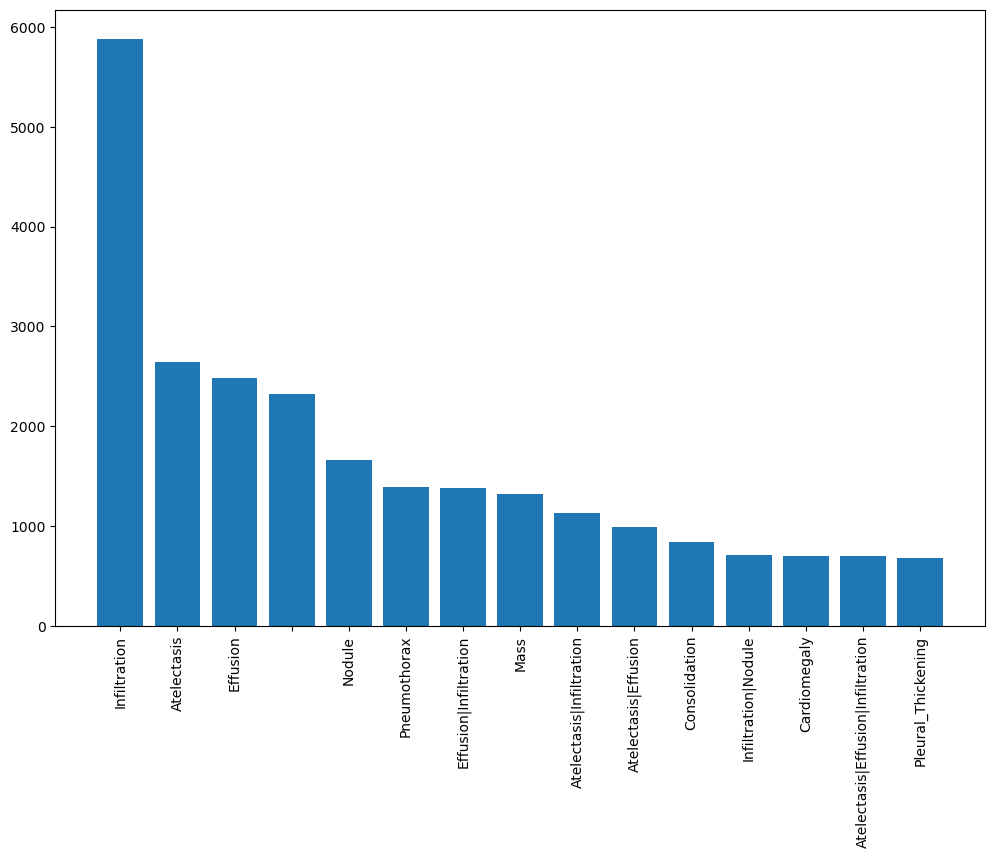

In [30]:
# since the dataset is very unbiased, we can resample it to be a more reasonable collection
# weight is 0.1 + number of findings
sample_weights = df_xray_images['Finding Labels'].map(lambda x: len(x.split('|')) if len(x) > 0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
df_xray_images = df_xray_images.sample(40000, weights = sample_weights)

label_counts = df_xray_images['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1, 1, figsize = (12, 8))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

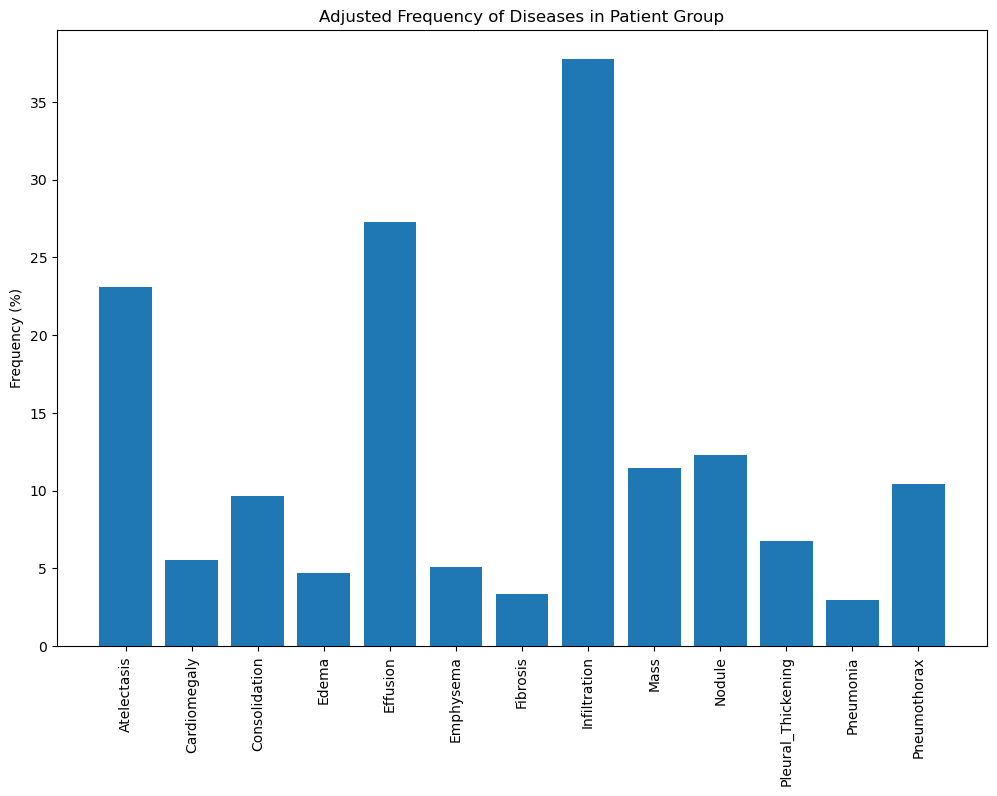

In [31]:
label_counts = 100 * np.mean(df_xray_images[all_labels].values, 0)
fig, ax1 = plt.subplots(1, 1, figsize = (12, 8))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

Prepare Training Data¶
Here we split the data into training and validation sets and create a single vector (disease_vec) with the 0/1 outputs for the disease status (what the model will try and predict)

In [32]:
df_xray_images['disease_vec'] = df_xray_images.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [33]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(df_xray_images, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = df_xray_images['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 30000 validation 10000


Create Data Generators
Here we make the data generators for loading and randomly transforming images

In [34]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
core_idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

In [35]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [36]:
train_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,disease_vec
14564,00003789_000.png,Nodule|Pneumonia,0,3789,41,M,AP,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4904,00001308_000.png,Pleural_Thickening,0,1308,12,M,PA,2048,2500,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
69341,00017111_002.png,Edema|Infiltration,2,17111,67,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
47692,00012094_009.png,Pneumonia,9,12094,63,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
92792,00023160_004.png,Effusion|Infiltration|Mass|Pneumothorax,4,23160,43,F,PA,2470,2991,0.143,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ..."


In [37]:

train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'Path2',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

valid_gen = flow_from_dataframe(core_idg, valid_df, 
                             path_col = 'Path2',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 256) # we can use much larger batches for evaluation
# used a fixed dataset for evaluating the algorithm
test_X, test_Y = next(flow_from_dataframe(core_idg, 
                               valid_df, 
                             path_col = 'Path2',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024)) # one big batch

## Ignore next message from keras, values are replaced anyways
Found 112120 images belonging to 1 classes.
Reinserting dataframe: 30000 images
## Ignore next message from keras, values are replaced anyways
Found 112120 images belonging to 1 classes.
Reinserting dataframe: 10000 images
## Ignore next message from keras, values are replaced anyways
Found 112120 images belonging to 1 classes.
Reinserting dataframe: 10000 images


ValueError: setting an array element with a sequence.